<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/5450_Project_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

# Business Impact

# Installing New Libraries

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00


In [2]:
!pip install mplcursors

In [3]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0c3220dc98ea38b0256766b7df03cba74ee8fa66df2eb9384e752828c3ffae7f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


# Importing Libraries

In [61]:
# imports
import pandas as pd
import copy
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import kagglehub
import itertools
import mplcursors
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Reading Data from Kaggle

In [6]:
# Download latest version
path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")

print("Path to dataset files:", path)

health_df = pd.read_csv(path + '/data.csv')
orig_health_df = copy.deepcopy(health_df)

100%|██████████| 14.0M/14.0M [00:00<00:00, 50.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/theworldbank/health-nutrition-and-population-statistics/versions/1


In [7]:
health_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Helper Functions

In [8]:
def plot_results(df_test_and_predicted, model):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Actual'], label='True Values') # Access the 'Actual' column data
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Predicted'], label='Predictions', linestyle='dashed') # Access the 'Predicted' column data
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.title(f'{model} Panel Data Prediction')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

In [9]:
def compare_actual_vs_predicted(X_test, y_test, y_pred, model):
    df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_actual_vs_predicted['Model'] = model
    df_test_and_predicted = pd.concat([X_test, df_actual_vs_predicted], axis=1)
    return df_test_and_predicted, df_actual_vs_predicted

In [10]:
def plot_kpi(df, x_col, y_col, hue_col):
    title_val = kpi_dict.get(y_col, y_col)
    fig = px.line(df, x=x_col, y=y_col, color=hue_col, title=title_val)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x")
    fig.show()

In [11]:
def show_unique_values(df):
    for e in zip(df.columns, df.dtypes):
        col_name, col_dtype = e
        if col_dtype == 'object':
            unique_values = df[col_name].unique()
            print(f"Unique values for column '{col_name}' are {unique_values}")
            print("---------------------------------------------------------------------")

In [12]:
def show_null_values(df):
    df_len = len(df)
    for col in df.columns:
        total_col_null_values = df[col].isnull().sum()
        pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
        print(f"Column '{col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
        print("---------------------------------------------------------------------")

In [13]:
def show_null_values_per_country(df, ind_col, col, country):
    df_len = len(df)
    total_col_null_values = df[col].isnull().sum()
    pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
    print(f"For country {country} indicator column '{ind_col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [14]:
def show_zero_values_per_indicator(df, ind_col):
    df_len = len(df)
    total_col_zero_values = df[ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")
    return pct_zero_values

In [15]:
def show_zero_values_per_ctry_indicator(df, ind_col, ctry):
    df_len = len(df[df['Country Name'] == ctry])
    total_col_zero_values = df[df['Country Name'] == ctry][ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For country {ctry}, indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [ ]:
def impute_data(df, ctry, kpi, fill_method):
    df = df[df['Country Name'] == ctry][[kpi]]
    #df[kpi] = df[kpi].replace(0, np.nan)
    if fill_method == 'knn':
        #scaler = MinMaxScaler()
        #df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
        imputer = KNNImputer(n_neighbors=2)
        df[kpi] = imputer.fit_transform(df[kpi])
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'bfill':
        df.bfill(axis = 0, inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)
    return list(itertools.chain(*df.values.tolist()))

# Exploratory Data Analysis

In [17]:
health_df.shape

(89010, 61)

In [18]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [19]:
health_df.dtypes

,0
Country Name,object
Country Code,object
Indicator Name,object
Indicator Code,object
1960,float64
...,...
2012,float64
2013,float64
2014,float64
2015,float64


In [20]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [21]:
ind_name_list = list(health_df['Indicator Name'].unique())
len(ind_name_list)

345

In [22]:
health_df.groupby(['Country Name']).agg({'Indicator Name' : np.size}).sort_values(by='Indicator Name', ascending=False)

,Indicator Name
Country Name,
Zimbabwe,345
Afghanistan,345
St. Martin (French part),345
St. Vincent and the Grenadines,345
Sub-Saharan Africa,345
...,...
Angola,345
Antigua and Barbuda,345
Arab World,345


In [23]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

# Data Processing

In [24]:
kpi_dict = dict(zip(health_df['Indicator Code'], health_df['Indicator Name']))

In [25]:
year_cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']

In [26]:
# Droppinmg unnamed columns
health_df.drop(columns=['Unnamed: 60'], inplace=True)
# replacing NaN with 0
for col in year_cols:
       health_df[col] = health_df[col].fillna(0)

In [27]:
'''
The data set contains both countries and conglomereate of multiple countries.
We are just extracing countries.
'''
country_name_list = ['Afghanistan',
                     'Albania',
                     'Algeria',
                     'American Samoa',
                     'Andorra',
                     'Angola',
                     'Antigua and Barbuda',
                     'Argentina',
                     'Armenia',
                     'Aruba',
                     'Australia',
                     'Austria',
                     'Azerbaijan',
                     'Bahamas, The',
                     'Bahrain',
                     'Bangladesh',
                     'Barbados',
                     'Belarus',
                     'Belgium',
                     'Belize',
                     'Benin',
                     'Bermuda',
                     'Bhutan',
                     'Bolivia',
                     'Bosnia and Herzegovina',
                     'Botswana',
                     'Brazil',
                     'British Virgin Islands',
                     'Brunei Darussalam',
                     'Bulgaria',
                     'Burkina Faso',
                     'Burundi',
                     'Cabo Verde',
                     'Cambodia',
                     'Cameroon',
                     'Canada',
                     'Cayman Islands',
                     'Central African Republic',
                     'Chad',
                     'Channel Islands',
                     'Chile',
                     'China',
                     'Colombia',
                     'Comoros',
                     'Congo, Dem. Rep.',
                     'Congo, Rep.',
                     'Costa Rica',
                     "Cote d'Ivoire",
                     'Croatia',
                     'Cuba',
                     'Curacao',
                     'Cyprus',
                     'Czech Republic',
                     'Denmark',
                     'Djibouti',
                     'Dominica',
                     'Dominican Republic',
                     'Ecuador',
                     'Egypt, Arab Rep.',
                     'El Salvador',
                     'Equatorial Guinea',
                     'Eritrea',
                     'Estonia',
                     'Ethiopia',
                     'Faroe Islands',
                     'Fiji',
                     'Finland',
                     'France',
                     'French Polynesia',
                     'Gabon',
                     'Gambia, The',
                     'Georgia',
                     'Germany',
                     'Ghana',
                     'Gibraltar',
                     'Greece',
                     'Greenland',
                     'Grenada',
                     'Guam',
                     'Guatemala',
                     'Guinea',
                     'Guinea-Bissau',
                     'Guyana',
                     'Haiti',
                     'Honduras',
                     'Hong Kong SAR, China',
                     'Hungary',
                     'Iceland',
                     'India',
                     'Indonesia',
                     'Iran, Islamic Rep.',
                     'Iraq',
                     'Ireland',
                     'Isle of Man',
                     'Israel',
                     'Italy',
                     'Jamaica',
                     'Japan',
                     'Jordan',
                     'Kazakhstan',
                     'Kenya',
                     'Kiribati',
                     'Korea, Dem. People’s Rep.',
                     'Korea, Rep.',
                     'Kosovo',
                     'Kuwait',
                     'Kyrgyz Republic',
                     'Lao PDR',
                     'Latvia',
                     'Lebanon',
                     'Lesotho',
                     'Liberia',
                     'Libya',
                     'Liechtenstein',
                     'Lithuania',
                     'Luxembourg',
                     'Macao SAR, China',
                     'Macedonia, FYR',
                     'Madagascar',
                     'Malawi',
                     'Malaysia',
                     'Maldives',
                     'Mali',
                     'Malta',
                     'Marshall Islands',
                     'Mauritania',
                     'Mauritius',
                     'Mexico',
                     'Micronesia, Fed. Sts.',
                     'Moldova',
                     'Monaco',
                     'Mongolia',
                     'Montenegro',
                     'Morocco',
                     'Mozambique',
                     'Myanmar',
                     'Namibia',
                     'Nauru',
                     'Nepal',
                     'Netherlands',
                     'New Caledonia',
                     'New Zealand',
                     'Nicaragua',
                     'Niger',
                     'Nigeria',
                     'Northern Mariana Islands',
                     'Norway',
                     'Oman',
                     'Pakistan',
                     'Palau',
                     'Panama',
                     'Papua New Guinea',
                     'Paraguay',
                     'Peru',
                     'Philippines',
                     'Poland',
                     'Portugal',
                     'Puerto Rico',
                     'Qatar',
                     'Romania',
                     'Russian Federation',
                     'Rwanda',
                     'Samoa',
                     'San Marino',
                     'Sao Tome and Principe',
                     'Saudi Arabia',
                     'Senegal',
                     'Serbia',
                     'Seychelles',
                     'Sierra Leone',
                     'Singapore',
                     'Sint Maarten (Dutch part)',
                     'Slovak Republic',
                     'Slovenia',
                     'Solomon Islands',
                     'Somalia',
                     'South Africa',
                     'South Sudan',
                     'Spain',
                     'Sri Lanka',
                     'St. Kitts and Nevis',
                     'St. Lucia',
                     'St. Martin (French part)',
                     'St. Vincent and the Grenadines',
                     'Sudan',
                     'Suriname',
                     'Swaziland',
                     'Sweden',
                     'Switzerland',
                     'Syrian Arab Republic',
                     'Tajikistan',
                     'Tanzania',
                     'Thailand',
                     'Timor-Leste',
                     'Togo',
                     'Tonga',
                     'Trinidad and Tobago',
                     'Tunisia',
                     'Turkey',
                     'Turkmenistan',
                     'Turks and Caicos Islands',
                     'Tuvalu',
                     'Uganda',
                     'Ukraine',
                     'United Arab Emirates',
                     'United Kingdom',
                     'United States',
                     'Uruguay',
                     'Uzbekistan',
                     'Vanuatu',
                     'Venezuela, RB',
                     'Vietnam',
                     'Virgin Islands (U.S.)',
                     'West Bank and Gaza',
                     'Yemen, Rep.',
                     'Zambia',
                     'Zimbabwe'
                     ]

In [28]:
country_year_health_df = health_df[health_df['Country Name'].isin(country_name_list)].reset_index(drop=True)
country_year_health_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0000,1.5000,0.000,0.0000,0.0000,0.0
1,Afghanistan,AFG,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0
2,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,145.321,145.321,145.321,145.321,145.321,145.321,...,123.1616,117.39,111.4708,105.5516,99.6324,93.7132,87.794,82.2638,76.7336,0.0
3,Afghanistan,AFG,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,0.000,0.000,0.000,0.000,0.000,0.000,...,3300.0000,3500.00,3800.0000,4200.0000,4500.0000,4900.0000,5300.000,5900.0000,6400.0000,6900.0
4,Afghanistan,AFG,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,0.000,0.000,0.000,0.000,0.000,0.000,...,500.0000,1000.00,1000.0000,1000.0000,1000.0000,1000.0000,1000.000,1000.0000,1000.0000,1000.0


In [29]:
#health_df_1 = country_year_health_df.set_index(['Country Name', 'Indicator Code'])[year_cols].unstack()
#health_df_1

In [30]:
'''
Formatting the dataframe structure.
In the original dataframe, the data is laid out for each country-kpi, data is
present in each row across the years.
In the new format, we are placing all the kpis for a country in a single row.
There will be multiple rows for each country pertaining to each year
ranging from 1960 thru 2015.
'''
comb_list = [list(country_year_health_df['Country Name'].unique())] + [year_cols]
result = list(itertools.product(*comb_list))
df_x = pd.DataFrame(result, columns=['Country Name', 'Year'])
for col in country_year_health_df['Indicator Code'].unique():
    df_x[col] = 0
df_x.set_index(['Country Name', 'Year'], inplace=True)
df_x.reset_index(inplace=True)
col_list = list(df_x.columns)

# Create an empty list to store the DataFrames
all_dfs = []
for ctry in country_year_health_df['Country Name'].unique():
    temp_df = country_year_health_df[country_year_health_df['Country Name'] == ctry].iloc[:, 3:].T
    series_names = temp_df.iloc[0, :]
    temp_df = temp_df.iloc[1:, :]
    temp_df.columns = series_names
    temp_df['Country Name'] = ctry
    temp_df.reset_index(inplace=True)
    temp_df.rename(columns={'index' : 'Year'}, inplace=True)
    temp_df = temp_df[col_list]

    # Append the temp_df to the list instead of using append
    all_dfs.append(temp_df)

# Concatenate all DataFrames in the list outside the loop
df_x = pd.concat(all_dfs, ignore_index=True)

<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-30-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-inpu

In [31]:
df_x.head(50)

Indicator Code,Country Name,Year,SH.HIV.KNOW.FE.ZS,SH.HIV.KNOW.MA.ZS,SP.ADO.TFRT,SH.HIV.TOTL,SH.HIV.INCD.TL,SH.DYN.AIDS,SH.HIV.INCD,SP.DYN.SMAM.FE,...,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SI.POV.URHC,SH.MLR.PREG.ZS,SH.MLR.NETS.ZS,SH.MLR.SPF2.ZS,SN.ITK.VITA.ZS,SP.DYN.WFRT,SH.DYN.AIDS.FE.ZS
0,Afghanistan,1960,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,739462.0,8.221,5.253807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1961,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,779754.0,8.508,5.305559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1962,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,822719.0,8.805,5.363622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1963,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,868325.0,9.11,5.395136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1964,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,917022.0,9.426,5.456539,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,1965,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,968697.0,9.75,5.482041,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,1966,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1023511.0,10.085,5.504228,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,1967,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1081445.0,10.43,5.505924,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Afghanistan,1968,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1143293.0,10.786,5.561459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Afghanistan,1969,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1209937.0,11.152,5.66556,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_x.shape

(12152, 347)

In [33]:
series_names = df_x.columns[2:]

In [34]:
# Checking % of data populated per country.
for series in series_names:
    print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.KNOW.FE.ZS Indicator Code        SH.HIV.KNOW.FE.ZS
Country Name                           
Afghanistan                         1.5
Albania                            34.0
Algeria                            21.4
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 15.6
Yemen, Rep.                         1.3
Zambia                            113.4
Zimbabwe                          217.8

[217 rows x 1 columns]
SH.HIV.KNOW.MA.ZS Indicator Code        SH.HIV.KNOW.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            20.3
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SP.POP.AG03.FE.IN Indicator Code        SP.POP.AG03.FE.IN
Country Name                           
Afghanistan                  15959954.0
Albania                       1588513.0
Algeria                      17835281.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           52088.0
West Bank and Gaza            1424820.0
Yemen, Rep.                  12312783.0
Zambia                        8097097.0
Zimbabwe                      8585770.0

[217 rows x 1 columns]
SP.POP.AG03.MA.IN Indicator Code        SP.POP.AG03.MA.IN
Country Name                           
Afghanistan                  16738420.0
Albania                       1688774.0
Algeria                      18559890.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           53844.0
West Bank and Gaza            1486562.0
Yemen, Rep.        

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG09.MA.IN Indicator Code        SP.POP.AG09.MA.IN
Country Name                           
Afghanistan                  13429943.0
Albania                       1675114.0
Algeria                      16665987.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48855.0
West Bank and Gaza            1272331.0
Yemen, Rep.                  10516031.0
Zambia                        6516300.0
Zimbabwe                      7378078.0

[217 rows x 1 columns]
SP.POP.AG10.FE.IN Indicator Code        SP.POP.AG10.FE.IN
Country Name                           
Afghanistan                  12266115.0
Albania                       1581721.0
Algeria                      15767862.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48506.0
West Bank and Gaza            1189371.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG14.MA.IN Indicator Code        SP.POP.AG14.MA.IN
Country Name                           
Afghanistan                  11212506.0
Albania                       1619460.0
Algeria                      15593118.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           46804.0
West Bank and Gaza            1107023.0
Yemen, Rep.                   9056292.0
Zambia                        5487383.0
Zimbabwe                      6507327.0

[217 rows x 1 columns]
SP.POP.AG15.FE.IN Indicator Code        SP.POP.AG15.FE.IN
Country Name                           
Afghanistan                  10198944.0
Albania                       1524726.0
Algeria                      14763239.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           46194.0
West Bank and Gaza            1032883.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SP.POP.AG18.MA.IN
Country Name                           
Afghanistan                   9641563.0
Albania                       1506069.0
Algeria                      14652372.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           40887.0
West Bank and Gaza             967936.0
Yemen, Rep.                   7905585.0
Zambia                        4780048.0
Zimbabwe                      5831291.0

[217 rows x 1 columns]
SP.POP.AG19.FE.IN Indicator Code        SP.POP.AG19.FE.IN
Country Name                           
Afghanistan                   8708368.0
Albania                       1412764.0
Algeria                      13857023.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           41069.0
West Bank and Gaza             900253.0
Yemen, Rep.                   7360914

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.AG22.MA.IN
Country Name                           
Afghanistan                   8288824.0
Albania                       1343647.0
Algeria                      13397432.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           34214.0
West Bank and Gaza             827369.0
Yemen, Rep.                   6675896.0
Zambia                        4142268.0
Zimbabwe                      5099550.0

[217 rows x 1 columns]
SP.POP.AG23.FE.IN Indicator Code        SP.POP.AG23.FE.IN
Country Name                           
Afghanistan                   7458261.0
Albania                       1264634.0
Algeria                      12652198.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           36573.0
West Bank and Gaza             769040.0
Yemen, Rep.                   6185139.

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.PMTC.ZS Indicator Code        SH.HIV.PMTC.ZS
Country Name                        
Afghanistan                     15.0
Albania                          0.0
Algeria                        291.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     43.0
Zambia                         525.0
Zimbabwe                       461.0

[217 rows x 1 columns]
SH.STA.ARIC.ZS Indicator Code        SH.STA.ARIC.ZS
Country Name                        
Afghanistan                     60.5
Albania                        197.6
Algeria                        247.6
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             206.3
Yemen, Rep.                    185.2
Zambia                         339.2
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.DTH.INJR.ZS Indicator Code        SH.DTH.INJR.ZS
Country Name                        
Afghanistan                     30.5
Albania                         13.9
Algeria                         19.2
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     18.8
Zambia                          18.7
Zimbabwe                        11.9

[217 rows x 1 columns]
SH.DTH.NCOM.ZS Indicator Code        SH.DTH.NCOM.ZS
Country Name                        
Afghanistan                     63.0
Albania                        172.5
Algeria                        146.8
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     70.3
Zambia                          37.5
Zimbabwe            

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MLR.TRET.ZS Indicator Code        SH.MLR.TRET.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      1.2
Zambia                         359.8
Zimbabwe                        33.9

[217 rows x 1 columns]
SH.MED.CMHW.P3 Indicator Code        SH.MED.CMHW.P3
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                        0.063
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    0.292
Zambia                         1.573
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.CON.AIDS.MA.ZS Indicator Code        SH.CON.AIDS.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            51.4
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                         0.0
Zambia                            190.1
Zimbabwe                          278.8

[217 rows x 1 columns]
SH.CON.1524.FE.ZS Indicator Code        SH.CON.1524.FE.ZS
Country Name                           
Afghanistan                         0.0
Albania                            12.6
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.DYN.CDRT.IN Indicator Code        SP.DYN.CDRT.IN
Country Name                        
Afghanistan                 1037.345
Albania                      382.656
Algeria                      550.264
American Samoa                   4.0
Andorra                         26.2
...                              ...
Virgin Islands (U.S.)         342.57
West Bank and Gaza           114.535
Yemen, Rep.                  861.534
Zambia                       894.183
Zimbabwe                     724.842

[217 rows x 1 columns]
SH.FPL.SATI.ZS Indicator Code        SH.FPL.SATI.ZS
Country Name                        
Afghanistan                      0.0
Albania                         84.4
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    108.2
Zambia                         270.1
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.0509.FE Indicator Code        SP.POP.0509.FE
Country Name                        
Afghanistan               68598231.0
Albania                    7894003.0
Algeria                   82676950.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       244071.0
West Bank and Gaza         6002973.0
Yemen, Rep.               54192342.0
Zambia                    34830663.0
Zimbabwe                  38639047.0

[217 rows x 1 columns]
SP.POP.1014.FE Indicator Code        SP.POP.1014.FE
Country Name                        
Afghanistan               57107521.0
Albania                    7791932.0
Algeria                   76787483.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       241212.0
West Bank and Gaza         5256432.0
Yemen, Rep.               46649107.0
Zambia                    29234193.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.3539.FE Indicator Code        SP.POP.3539.FE
Country Name                        
Afghanistan               21840613.0
Albania                    4578724.0
Algeria                   38691898.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       182826.0
West Bank and Gaza         2029940.0
Yemen, Rep.               16808516.0
Zambia                    10527034.0
Zimbabwe                  12351831.0

[217 rows x 1 columns]
SP.POP.4044.FE Indicator Code        SP.POP.4044.FE
Country Name                        
Afghanistan               17894083.0
Albania                    4163269.0
Algeria                   31961790.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       170806.0
West Bank and Gaza         1626402.0
Yemen, Rep.               14196003.0
Zambia                     8251127.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7074.FE Indicator Code        SP.POP.7074.FE
Country Name                        
Afghanistan                3243212.0
Albania                    1508723.0
Algeria                    8683707.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        57429.0
West Bank and Gaza          316668.0
Yemen, Rep.                2931200.0
Zambia                     1990804.0
Zimbabwe                   2527985.0

[217 rows x 1 columns]
SP.POP.7579.FE Indicator Code        SP.POP.7579.FE
Country Name                        
Afghanistan                1783463.0
Albania                    1077458.0
Algeria                    5681535.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        38083.0
West Bank and Gaza          191764.0
Yemen, Rep.                1811551.0
Zambia                     1203491.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.XPD.PUBL Indicator Code         SH.XPD.PUBL
Country Name                      
Afghanistan             261.283978
Albania                 802.355944
Algeria                1451.276249
American Samoa                 0.0
Andorra                1438.198973
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza             0.0
Yemen, Rep.              729.62202
Zambia                  979.150553
Zimbabwe                559.262645

[217 rows x 1 columns]
SH.XPD.TOTL.ZS Indicator Code        SH.XPD.TOTL.ZS
Country Name                        
Afghanistan               107.249057
Albania                   124.530842
Algeria                     86.73308
American Samoa                   0.0
Andorra                   132.578432
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                96.540533
Zambia                     119.03871
Zimbabwe                   92.278243

[217 rows x 

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.IMM.HEPB Indicator Code        SH.IMM.HEPB
Country Name                     
Afghanistan                 614.0
Albania                    1567.0
Algeria                    1089.0
American Samoa                0.0
Andorra                    1430.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                 951.0
Zambia                      921.0
Zimbabwe                   1273.0

[217 rows x 1 columns]
SH.IMM.HIB3 Indicator Code        SH.IMM.HIB3
Country Name                     
Afghanistan                 487.0
Albania                     690.0
Algeria                     758.0
American Samoa                0.0
Andorra                    1660.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                 745.0
Zambia                     1004.0
Zimbabwe                    702.0

[217 rows x 1 columns]
SH.IMM.MEAS Indicator Code        SH.IMM.ME

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.H2O.SAFE.UR.ZS Indicator Code        SH.H2O.SAFE.UR.ZS
Country Name                           
Afghanistan                      1461.4
Albania                          2558.8
Algeria                          2381.9
American Samoa                   2547.6
Andorra                          2600.0
...                                 ...
Virgin Islands (U.S.)            2600.0
West Bank and Gaza               2144.3
Yemen, Rep.                      1880.9
Zambia                           2262.5
Zimbabwe                         2555.9

[217 rows x 1 columns]
SH.HIV.INCD.ZS Indicator Code        SH.HIV.INCD.ZS
Country Name                        
Afghanistan                     0.26
Albania                          0.0
Algeria                         0.26
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     0.26
Zambia          

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.0004.MA Indicator Code        SP.POP.0004.MA
Country Name                        
Afghanistan               86963559.0
Albania                    8444607.0
Algeria                   95046561.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       285358.0
West Bank and Gaza         7115221.0
Yemen, Rep.               66043297.0
Zambia                    42790788.0
Zimbabwe                  44658571.0

[217 rows x 1 columns]
SP.POP.0509.MA Indicator Code        SP.POP.0509.MA
Country Name                        
Afghanistan               72282977.0
Albania                    8360057.0
Algeria                   86091940.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       247843.0
West Bank and Gaza         6256708.0
Yemen, Rep.               55988752.0
Zambia                    35116777.0
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.80UP.MA Indicator Code        SP.POP.80UP.MA
Country Name                        
Afghanistan                 925780.0
Albania                     693012.0
Algeria                    3728372.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        24440.0
West Bank and Gaza           95328.0
Yemen, Rep.                1204557.0
Zambia                      621233.0
Zimbabwe                   1014795.0

[217 rows x 1 columns]
SH.STA.STNT.ZS Indicator Code        SH.STA.STNT.ZS
Country Name                        
Afghanistan                    112.5
Albania                   109.700001
Algeria                   136.799998
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza         56.800001
Yemen, Rep.               313.200001
Zambia                    349.299999
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DYN.MORT.FE Indicator Code        SH.DYN.MORT.FE
Country Name                        
Afghanistan                    497.7
Albania                         87.2
Algeria                        129.2
American Samoa                   0.0
Andorra                         17.4
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             110.0
Yemen, Rep.                    299.8
Zambia                         470.7
Zimbabwe                       315.5

[217 rows x 1 columns]
SH.DYN.MORT.MA Indicator Code        SH.DYN.MORT.MA
Country Name                        
Afghanistan                    529.6
Albania                        106.9
Algeria                        148.9
American Samoa                   0.0
Andorra                         21.1
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             127.6
Yemen, Rep.                    335.2
Zambia                         527.8
Zimbabwe             

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MED.PHYS.ZS Indicator Code        SH.MED.PHYS.ZS
Country Name                        
Afghanistan                 3.000472
Albania                    35.718074
Algeria                     9.835662
American Samoa                1.5533
Andorra                       33.838
...                              ...
Virgin Islands (U.S.)          3.295
West Bank and Gaza             1.337
Yemen, Rep.                 2.658804
Zambia                      1.772187
Zimbabwe                    2.045896

[217 rows x 1 columns]
SP.POP.0004.FE.5Y Indicator Code        SP.POP.0004.FE.5Y
Country Name                           
Afghanistan                 1045.063969
Albania                      626.815218
Algeria                      828.280605
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        625.275428
West Bank and Gaza           449.744849
Yemen, Rep.                 1022.772945
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.1564.FE.IN Indicator Code        SP.POP.1564.FE.IN
Country Name                           
Afghanistan                 227509965.0
Albania                      45197068.0
Algeria                     390866884.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         1663441.0
West Bank and Gaza           21159228.0
Yemen, Rep.                 185333453.0
Zambia                      115509361.0
Zimbabwe                    138564754.0

[217 rows x 1 columns]
SP.POP.1564.FE.ZS Indicator Code        SP.POP.1564.FE.ZS
Country Name                           
Afghanistan                 2865.071538
Albania                     3357.598318
Algeria                     3137.095108
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)       3467.664262
West Bank and Gaza          1348.961933
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.3539.FE.5Y Indicator Code        SP.POP.3539.FE.5Y
Country Name                           
Afghanistan                   278.42528
Albania                      337.916492
Algeria                      304.667383
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        377.610382
West Bank and Gaza           128.489635
Yemen, Rep.                  266.912162
Zambia                       261.752605
Zimbabwe                     260.132946

[217 rows x 1 columns]
SP.POP.3539.MA.5Y Indicator Code        SP.POP.3539.MA.5Y
Country Name                           
Afghanistan                  285.502617
Albania                      335.350341
Algeria                      300.626101
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        362.671709
West Bank and Gaza            126.25742
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.5559.FE.5Y Indicator Code        SP.POP.5559.FE.5Y
Country Name                           
Afghanistan                  119.597175
Albania                      203.380476
Algeria                      145.847965
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        248.840817
West Bank and Gaza            49.993293
Yemen, Rep.                  124.980582
Zambia                       118.801195
Zimbabwe                     114.807309

[217 rows x 1 columns]
SP.POP.5559.MA.5Y Indicator Code        SP.POP.5559.MA.5Y
Country Name                           
Afghanistan                  115.997787
Albania                      210.435338
Algeria                      136.841027
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        248.798784
West Bank and Gaza            49.463134
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.65UP.TO Indicator Code        SP.POP.65UP.TO
Country Name                        
Afghanistan               21829793.0
Albania                   10418272.0
Algeria                   57666062.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       392993.0
West Bank and Gaza         2045181.0
Yemen, Rep.               19978392.0
Zambia                    12576680.0
Zimbabwe                  16447965.0

[217 rows x 1 columns]
SP.POP.6569.FE.5Y Indicator Code        SP.POP.6569.FE.5Y
Country Name                           
Afghanistan                    64.92771
Albania                      140.250966
Algeria                       94.696045
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        160.216465
West Bank and Gaza            28.897106
Yemen, Rep.                   70.857619
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.TOTL.MA.ZS Indicator Code        SP.POP.TOTL.MA.ZS
Country Name                           
Afghanistan                 2873.186536
Albania                     2847.582547
Algeria                     2824.543278
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)       2716.651914
West Bank and Gaza          1317.814114
Yemen, Rep.                 2790.523786
Zambia                      2783.513652
Zimbabwe                    2783.818613

[217 rows x 1 columns]
SP.POP.TOTL Indicator Code          SP.POP.TOTL
Country Name                       
Afghanistan             920084314.0
Albania                 151041710.0
Algeria                1356957166.0
American Samoa            2350424.0
Andorra                   2775198.0
...                             ...
Virgin Islands (U.S.)     5110330.0
West Bank and Gaza       81812260.0
Yemen, Rep.             722478343.0
Zambia                  455058

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.PRG.ANEM Indicator Code        SH.PRG.ANEM
Country Name                     
Afghanistan                 779.3
Albania                     444.9
Algeria                     590.4
American Samoa                0.0
Andorra                     399.7
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                 681.2
Zambia                      713.9
Zimbabwe                    569.1

[217 rows x 1 columns]
SH.ANM.ALLW.ZS Indicator Code        SH.ANM.ALLW.ZS
Country Name                        
Afghanistan                    563.4
Albania                        400.4
Algeria                        609.6
American Samoa                   0.0
Andorra                        248.9
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             512.6
Yemen, Rep.                    702.9
Zambia                         578.3
Zimbabwe                       562.8

[217 rows x 1 columns]
SH

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.OW15.FE.ZS Indicator Code        SH.STA.OW15.FE.ZS
Country Name                           
Afghanistan                        36.0
Albania                            94.4
Algeria                           123.2
American Samoa                      0.0
Andorra                           122.2
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                       105.5
Zambia                             73.7
Zimbabwe                           87.3

[217 rows x 1 columns]
SH.STA.OWGH.MA.ZS Indicator Code        SH.STA.OWGH.MA.ZS
Country Name                           
Afghanistan                         6.3
Albania                       77.799999
Algeria                       78.400001
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 19.4
Yemen, Rep.         

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SH.PRG.SYPH.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                         2.69
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     0.35
Zambia                         24.65
Zimbabwe                     14.1106

[217 rows x 1 columns]
SH.TBS.PREV Indicator Code        SH.TBS.PREV
Country Name                     
Afghanistan                9312.0
Albania                     692.0
Algeria                    3063.0
American Samoa              361.2
Andorra                     657.0
...                           ...
Virgin Islands (U.S.)       236.9
West Bank and Gaza          245.8
Yemen, Rep.                4088.0
Zambia                    15875.0
Zimbabwe                   9618.0

[217 rows x 1 columns]
SN.ITK.DEFC.ZS In

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SE.PRM.CMPT.MA.ZS
Country Name                           
Afghanistan                  298.705193
Albania                     1261.544456
Algeria                     3539.270157
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza          1654.546448
Yemen, Rep.                  754.653694
Zambia                      2395.932182
Zimbabwe                      625.87841

[217 rows x 1 columns]
SE.PRM.CMPT.ZS Indicator Code        SE.PRM.CMPT.ZS
Country Name                        
Afghanistan               193.922177
Albania                  1256.940369
Algeria                  3295.139198
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1648.499947
Yemen, Rep.                613.14455
Zambia                   2119.6529

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.RUR.TOTL.ZG Indicator Code        SP.RUR.TOTL.ZG
Country Name                        
Afghanistan               107.565965
Albania                    11.860026
Algeria                    41.898061
American Samoa              5.138215
Andorra                     65.75629
...                              ...
Virgin Islands (U.S.)    -103.591167
West Bank and Gaza         53.836908
Yemen, Rep.               133.003649
Zambia                    136.469133
Zimbabwe                  119.839509

[217 rows x 1 columns]
SI.POV.RUHC Indicator Code        SI.POV.RUHC
Country Name                     
Afghanistan                  76.5
Albania                      83.7
Algeria                       0.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza          168.4
Yemen, Rep.                  40.1
Zambia                       77.9
Zimbabwe                     84.3

[217 rows x 1 columns]
SE

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SE.PRM.NENR.MA Indicator Code        SE.PRM.NENR.MA
Country Name                        
Afghanistan                86.541237
Albania                  1031.748589
Algeria                   3165.69326
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1367.944092
Yemen, Rep.               676.559731
Zambia                   2235.772667
Zimbabwe                  669.467155

[217 rows x 1 columns]
SE.SEC.ENRR Indicator Code         SE.SEC.ENRR
Country Name                      
Afghanistan             789.925303
Albania                3117.054924
Algeria                2079.166677
American Samoa                 0.0
Andorra                 170.715113
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza     1566.580704
Yemen, Rep.             453.269665
Zambia                  309.707088
Zimbabwe               1058.006917

[217 rows x 

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SE.SEC.NENR.MA Indicator Code        SE.SEC.NENR.MA
Country Name                        
Afghanistan               200.137268
Albania                   308.727158
Algeria                    223.36384
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1263.844505
Yemen, Rep.               143.765179
Zambia                           0.0
Zimbabwe                  291.111713

[217 rows x 1 columns]
SE.TER.ENRR Indicator Code        SE.TER.ENRR
Country Name                     
Afghanistan              38.85766
Albania                709.452175
Algeria                434.071683
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza     687.766735
Yemen, Rep.              122.1071
Zambia                   30.57115
Zimbabwe                 71.61524

[217 rows x 1 columns]
SE

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MED.SAOP.P5 Indicator Code        SH.MED.SAOP.P5
Country Name                        
Afghanistan                 0.028169
Albania                     7.071747
Algeria                    12.119625
American Samoa                   0.0
Andorra                    60.273973
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                 0.809655
Zambia                      1.107955
Zimbabwe                    1.308309

[217 rows x 1 columns]
SP.DYN.TO65.FE.ZS Indicator Code        SP.DYN.TO65.FE.ZS
Country Name                           
Afghanistan                  2260.09436
Albania                      4541.83972
Algeria                      3641.40006
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        4521.50141
West Bank and Gaza            3780.6621
Yemen, Rep.                  2807.73369
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.TBS.CURE.ZS Indicator Code        SH.TBS.CURE.ZS
Country Name                        
Afghanistan                   1380.0
Albania                       1128.0
Algeria                       1659.0
American Samoa                1208.0
Andorra                       1400.0
...                              ...
Virgin Islands (U.S.)           50.0
West Bank and Gaza            1129.0
Yemen, Rep.                   1521.0
Zambia                        1293.0
Zimbabwe                      1343.0

[217 rows x 1 columns]
SL.UEM.TOTL.FE.ZS Indicator Code        SL.UEM.TOTL.FE.ZS
Country Name                           
Afghanistan                  380.899996
Albania                      397.999999
Algeria                      837.099993
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza           427.599998
Yemen, Rep.                  864.900003
Zambia                

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.MLR.NETS.ZS Indicator Code        SH.MLR.NETS.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         248.4
Zimbabwe                        56.9

[217 rows x 1 columns]
SH.MLR.SPF2.ZS Indicator Code        SH.MLR.SPF2.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         395.9
Zimbabwe            

<ipython-input-34-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7c48bf900670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))


In [35]:
# Checking % of zero values per country-kpi level.
for ctry in country_year_health_df['Country Name'].unique():
    for series in series_names:
        show_zero_values_per_ctry_indicator(df_x, series, ctry)

Streaming output truncated to the last 5000 lines.
For country Vanuatu, indicator column 'SP.POP.80UP.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.1014.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.GROW' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.IN' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.ZS' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.MA.IN' has 0.0% zero values (0 out of 56).
-----------------------------------------

In [36]:
# Checking % of zero values at kpi level across all countries.
for series in series_names:
    show_zero_values_per_indicator(df_x, series)

For indicator column 'SH.HIV.KNOW.FE.ZS' has 97.82% zero values (11887 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.KNOW.MA.ZS' has 98.8% zero values (12006 out of 12152).
---------------------------------------------------------------------
For indicator column 'SP.ADO.TFRT' has 12.2% zero values (1482 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.TOTL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD.TL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.DYN.AIDS' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD' has 77.11% zero values (9370 out of 12152).
------------

In [37]:
list(range(int(min(year_cols)), int(max(year_cols)), 5))

[1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]

In [38]:
# Checking % of zero values for each kpi across countries with different year cut off.
# The reason for using year cut off is that not alway the kpi values are populated from certain years.
# This % values will help us to use the ones that have zero values under certain threshold.
kpi_matrix = []
for series in series_names:
    for year in list(range(int(min(year_cols)), int(max(year_cols)), 5)):
        print(f"Cut off year {year}")
        pct_zero_values = show_zero_values_per_indicator(df_x[df_x['Year'] >= str(year)], series)
        kpi_matrix.append([year, series, pct_zero_values])
df_kpi = pd.DataFrame(kpi_matrix, columns=['Year', 'Indicator', 'Pct_Zero_Values'])
df_kpi.head()

Streaming output truncated to the last 5000 lines.
For indicator column 'SH.DYN.MORT.MA' has 88.52% zero values (5955 out of 6727).
---------------------------------------------------------------------
Cut off year 1990
For indicator column 'SH.DYN.MORT.MA' has 86.32% zero values (4870 out of 5642).
---------------------------------------------------------------------
Cut off year 1995
For indicator column 'SH.DYN.MORT.MA' has 87.29% zero values (3978 out of 4557).
---------------------------------------------------------------------
Cut off year 2000
For indicator column 'SH.DYN.MORT.MA' has 83.32% zero values (2893 out of 3472).
---------------------------------------------------------------------
Cut off year 2005
For indicator column 'SH.DYN.MORT.MA' has 83.83% zero values (2001 out of 2387).
---------------------------------------------------------------------
Cut off year 2010
For indicator column 'SH.DYN.MORT.MA' has 70.35% zero values (916 out of 1302).
------------------------

,Year,Indicator,Pct_Zero_Values
0,1960,SH.HIV.KNOW.FE.ZS,97.82
1,1965,SH.HIV.KNOW.FE.ZS,97.61
2,1970,SH.HIV.KNOW.FE.ZS,97.35
3,1975,SH.HIV.KNOW.FE.ZS,97.02
4,1980,SH.HIV.KNOW.FE.ZS,96.61


In [39]:
df_kpi[df_kpi['Indicator'] == 'SH.HIV.KNOW.FE.ZS']

,Year,Indicator,Pct_Zero_Values
0,1960,SH.HIV.KNOW.FE.ZS,97.82
1,1965,SH.HIV.KNOW.FE.ZS,97.61
2,1970,SH.HIV.KNOW.FE.ZS,97.35
3,1975,SH.HIV.KNOW.FE.ZS,97.02
4,1980,SH.HIV.KNOW.FE.ZS,96.61
5,1985,SH.HIV.KNOW.FE.ZS,96.06
6,1990,SH.HIV.KNOW.FE.ZS,95.30
7,1995,SH.HIV.KNOW.FE.ZS,94.18
8,2000,SH.HIV.KNOW.FE.ZS,92.45
9,2005,SH.HIV.KNOW.FE.ZS,91.24


In [40]:
df_kpi[df_kpi['Indicator'] == 'SH.TBS.PREV']

,Year,Indicator,Pct_Zero_Values
3179,1960,SH.TBS.PREV,57.68
3180,1965,SH.TBS.PREV,53.53
3181,1970,SH.TBS.PREV,48.48
3182,1975,SH.TBS.PREV,42.19
3183,1980,SH.TBS.PREV,34.17
3184,1985,SH.TBS.PREV,23.55
3185,1990,SH.TBS.PREV,8.84
3186,1995,SH.TBS.PREV,9.48
3187,2000,SH.TBS.PREV,10.57
3188,2005,SH.TBS.PREV,12.78


In [41]:
df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)
df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] < 20]

<ipython-input-41-1ce624dd835f>:1: FutureWarning: The provided callable <function mean at 0x7c48bf9015a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)


,Indicator,Pct_Zero_Values
329,SP.POP.TOTL,0.467273
328,SP.POP.GROW,0.589091
343,SP.URB.TOTL.IN.ZS,1.203636
342,SP.URB.TOTL,1.390000
341,SP.URB.GROW,1.442727
...,...,...
182,SP.DYN.TO65.MA.ZS,15.068182
165,SP.ADO.TFRT,15.068182
181,SP.DYN.TO65.FE.ZS,15.068182
166,SP.DYN.AMRT.FE,17.246364


In [42]:
df_kpi[df_kpi['Indicator'] == 'SP.DYN.AMRT.MA']

,Year,Indicator,Pct_Zero_Values
2046,1960,SP.DYN.AMRT.MA,13.68
2047,1965,SP.DYN.AMRT.MA,13.81
2048,1970,SP.DYN.AMRT.MA,13.96
2049,1975,SP.DYN.AMRT.MA,14.15
2050,1980,SP.DYN.AMRT.MA,14.39
2051,1985,SP.DYN.AMRT.MA,14.78
2052,1990,SP.DYN.AMRT.MA,15.40
2053,1995,SP.DYN.AMRT.MA,16.59
2054,2000,SP.DYN.AMRT.MA,18.52
2055,2005,SP.DYN.AMRT.MA,22.33


In [43]:
df_x.to_csv('health_data_processed.csv', index=False)
df_kpi.to_csv('kpi_matrix.csv', index=False)
df_kpi_agg.to_csv('kpi_matrix_agg.csv', index=False)

In [44]:
df_x[(df_x['Country Name'] == 'Albania')][['Year', 'SH.DYN.AIDS.FE.ZS']]

Indicator Code,Year,SH.DYN.AIDS.FE.ZS
56,1960,0.0
57,1961,0.0
58,1962,0.0
59,1963,0.0
60,1964,0.0
61,1965,0.0
62,1966,0.0
63,1967,0.0
64,1968,0.0
65,1969,0.0


In [45]:
'''
profile = ProfileReport(df_x, title="Profiling Report")
profile
'''

'\nprofile = ProfileReport(df_x, title="Profiling Report")\nprofile\n'

In [46]:
df_x.head(50)

Indicator Code,Country Name,Year,SH.HIV.KNOW.FE.ZS,SH.HIV.KNOW.MA.ZS,SP.ADO.TFRT,SH.HIV.TOTL,SH.HIV.INCD.TL,SH.DYN.AIDS,SH.HIV.INCD,SP.DYN.SMAM.FE,...,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SI.POV.URHC,SH.MLR.PREG.ZS,SH.MLR.NETS.ZS,SH.MLR.SPF2.ZS,SN.ITK.VITA.ZS,SP.DYN.WFRT,SH.DYN.AIDS.FE.ZS
0,Afghanistan,1960,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,739462.0,8.221,5.253807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1961,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,779754.0,8.508,5.305559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1962,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,822719.0,8.805,5.363622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1963,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,868325.0,9.11,5.395136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1964,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,917022.0,9.426,5.456539,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,1965,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,968697.0,9.75,5.482041,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,1966,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1023511.0,10.085,5.504228,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,1967,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1081445.0,10.43,5.505924,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Afghanistan,1968,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1143293.0,10.786,5.561459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Afghanistan,1969,0.0,0.0,145.321,0.0,0.0,0.0,0.0,0.0,...,1209937.0,11.152,5.66556,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Imputations

In [47]:
cutoff_pct = 20

In [48]:
selected_kpi_list = df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] <= cutoff_pct]['Indicator'].unique().tolist()
selected_kpi_list

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.URB.TOTL.IN.ZS',
 'SP.URB.TOTL',
 'SP.URB.GROW',
 'SP.RUR.TOTL.ZS',
 'SP.RUR.TOTL',
 'SP.RUR.TOTL.ZG',
 'SP.POP.AG04.MA.IN',
 'SP.POP.AG05.FE.IN',
 'SP.POP.AG05.MA.IN',
 'SP.POP.AG06.FE.IN',
 'SP.POP.AG06.MA.IN',
 'SP.POP.AG25.FE.IN',
 'SP.POP.AG25.MA.IN',
 'SP.POP.AG07.FE.IN',
 'SP.POP.AG07.MA.IN',
 'SP.POP.AG08.FE.IN',
 'SP.POP.AG08.MA.IN',
 'SP.POP.AG09.FE.IN',
 'SP.POP.AG09.MA.IN',
 'SP.POP.AG10.FE.IN',
 'SP.POP.AG10.MA.IN',
 'SP.POP.AG15.FE.IN',
 'SP.POP.AG15.MA.IN',
 'SP.POP.AG16.FE.IN',
 'SP.POP.AG16.MA.IN',
 'SP.POP.AG21.FE.IN',
 'SP.POP.AG21.MA.IN',
 'SP.POP.AG22.FE.IN',
 'SP.POP.AG22.MA.IN',
 'SP.POP.AG23.FE.IN',
 'SP.POP.AG23.MA.IN',
 'SP.POP.AG24.FE.IN',
 'SP.POP.AG24.MA.IN',
 'SP.POP.AG17.FE.IN',
 'SP.POP.AG19.MA.IN',
 'SP.POP.AG20.FE.IN',
 'SP.POP.AG20.MA.IN',
 'SP.POP.AG17.MA.IN',
 'SP.POP.AG14.FE.IN',
 'SP.POP.AG18.FE.IN',
 'SP.POP.AG18.MA.IN',
 'SP.POP.AG19.FE.IN',
 'SP.POP.AG00.FE.IN',
 'SP.POP.AG00.MA.IN',
 'SP.POP.AG01.FE.IN',
 '

In [49]:
df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)]

,Year,Indicator,Pct_Zero_Values
22,1960,SP.ADO.TFRT,12.20
23,1965,SP.ADO.TFRT,12.35
24,1970,SP.ADO.TFRT,12.54
25,1975,SP.ADO.TFRT,12.78
26,1980,SP.ADO.TFRT,13.08
...,...,...,...
3713,1990,SP.URB.GROW,1.26
3714,1995,SP.URB.GROW,1.14
3715,2000,SP.URB.GROW,1.07
3716,2005,SP.URB.GROW,1.13


In [50]:
min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()
min_pct_zero_values_list

<ipython-input-50-be359f86b798>:1: FutureWarning: The provided callable <function min at 0x7c48bf900dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()


[11.1,
 11.06,
 12.2,
 13.68,
 9.49,
 9.87,
 11.41,
 11.35,
 10.69,
 10.67,
 10.64,
 10.63,
 10.45,
 0.25,
 0.12,
 5.02,
 5.05,
 4.96,
 1.07,
 1.04,
 0.99]

In [51]:
df_kpi_1 = df_kpi[(df_kpi['Indicator'].isin(selected_kpi_list)) & (df_kpi['Pct_Zero_Values'].isin(min_pct_zero_values_list))].sort_values(by='Indicator')
df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()
df_kpi_2['Year'].value_counts()

<ipython-input-51-4d256c78af38>:2: FutureWarning: The provided callable <function min at 0x7c48bf900dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()


,count
Year,
2010,52
1990,50
1995,34
1965,14
1960,6
1980,4
2000,3
1975,2
1985,2


In [52]:
year_cutoff = 1990

In [53]:
df_x.isna().any()

,0
Indicator Code,
Country Name,False
Year,False
SH.HIV.KNOW.FE.ZS,False
SH.HIV.KNOW.MA.ZS,False
SP.ADO.TFRT,False
...,...
SH.MLR.NETS.ZS,False
SH.MLR.SPF2.ZS,False
SN.ITK.VITA.ZS,False


In [85]:
col_list = ['Country Name', 'Year'] + selected_kpi_list
df_x_1 = df_x[(df_x['Year'] >= str(year_cutoff))][col_list].reset_index(drop=True)
df_x_1.shape

(5642, 170)

In [86]:
df_x_1.isna().any()

,0
Indicator Code,
Country Name,False
Year,False
SP.POP.TOTL,False
SP.POP.GROW,False
SP.URB.TOTL.IN.ZS,False
...,...
SP.DYN.TO65.MA.ZS,False
SP.ADO.TFRT,False
SP.DYN.TO65.FE.ZS,False


In [124]:
(df_x_1 == 0).any().any()

False

In [88]:
for kpi in selected_kpi_list:
    df_x_1[kpi] = df_x_1[kpi].replace(0, np.nan)

<ipython-input-88-cfca7a86d307>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_x_1[kpi] = df_x_1[kpi].replace(0, np.nan)


In [89]:
df_x_1.isna().any()

,0
Indicator Code,
Country Name,False
Year,False
SP.POP.TOTL,True
SP.POP.GROW,True
SP.URB.TOTL.IN.ZS,True
...,...
SP.DYN.TO65.MA.ZS,True
SP.ADO.TFRT,True
SP.DYN.TO65.FE.ZS,True


In [91]:
df_x_1.head()

Indicator Code,Country Name,Year,SP.POP.TOTL,SP.POP.GROW,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.RUR.TOTL.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,...,SP.DYN.LE00.IN,SH.DYN.MORT,SP.DYN.IMRT.IN,SH.DTH.MORT,SH.DTH.IMRT,SP.DYN.TO65.MA.ZS,SP.ADO.TFRT,SP.DYN.TO65.FE.ZS,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA
0,Afghanistan,1990,12067570.0,3.879694,18.316,2210296.0,5.409140,81.684,9857274.0,3.539933,...,49.861049,181.0,122.5,100437.0,68718.0,39.82877,162.7380,44.99139,348.006,396.086
1,Afghanistan,1991,12789374.0,5.809298,18.597,2378440.0,7.331837,81.403,10410934.0,5.464694,...,50.640976,174.2,118.3,101417.0,69482.0,40.92956,163.3270,46.17192,339.753,387.388
2,Afghanistan,1992,13745630.0,7.210629,18.882,2595450.0,8.731510,81.118,11150180.0,6.859904,...,51.362927,167.8,114.4,104899.0,72376.0,42.03034,163.9160,47.35245,331.500,378.690
3,Afghanistan,1993,14824371.0,7.555156,19.170,2841832.0,9.068900,80.830,11982539.0,7.199487,...,52.021878,162.0,110.9,109625.0,76190.0,42.72012,164.1812,48.09906,326.244,373.408
4,Afghanistan,1994,15869967.0,6.815594,19.462,3088613.0,8.327321,80.538,12781354.0,6.453688,...,52.614341,156.8,107.7,113758.0,79446.0,43.40989,164.4464,48.84567,320.988,368.125


In [57]:
df_x_1.to_csv('health_data_processed_1.csv', index=False)

In [93]:
df_x_1[selected_kpi_list].isna().sum().sum()

98550

In [95]:
df_x_1[selected_kpi_list].isna().sum()

,0
Indicator Code,
SP.POP.TOTL,15
SP.POP.GROW,25
SP.URB.TOTL.IN.ZS,56
SP.URB.TOTL,67
SP.URB.GROW,71
...,...
SP.DYN.TO65.MA.ZS,792
SP.ADO.TFRT,792
SP.DYN.TO65.FE.ZS,792


In [96]:
df_x_1[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code,Country Name,Year,SP.DYN.AMRT.MA
0,Afghanistan,1990,396.086
1,Afghanistan,1991,387.388
2,Afghanistan,1992,378.690
3,Afghanistan,1993,373.408
4,Afghanistan,1994,368.125
...,...,...,...
5637,Zimbabwe,2011,517.349
5638,Zimbabwe,2012,477.223
5639,Zimbabwe,2013,445.135
5640,Zimbabwe,2014,413.047


In [122]:
country_kpi_pop_list = []
for ctry in df_x_1['Country Name'].unique():
    missing_kpi_count = 0
    for kpi in selected_kpi_list:
        # No value is present for the country-kpi combination.
        # In that case, we are replacing with avg kpi value across all countries.
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() == len(df_x_1[df_x_1['Country Name'] == ctry][kpi]):
            missing_kpi_count += 1
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = df_x_1[kpi].mean(axis=0)
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() > 0 and len(df_x_1[df_x_1['Country Name'] == ctry][kpi]) != df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum():
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'knn')
            '''
            if df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'ffill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'bfill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'mean')
            '''
    country_kpi_pop_list.append((ctry, missing_kpi_count, len(df_x_1[df_x_1['Country Name'] == ctry])))

<ipython-input-90-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kpi] = imputer.fit_transform(df[[kpi]])
<ipython-input-90-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kpi] = imputer.fit_transform(df[[kpi]])
<ipython-input-90-2db7d6f7eaf7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [128]:
df_country_kpi_pop = pd.DataFrame(country_kpi_pop_list, columns=['Country Name', 'Missing KPI Count', 'Total Records'])
df_country_kpi_pop

,Country Name,Missing KPI Count,Total Records
0,Afghanistan,0,26
1,Albania,0,26
2,Algeria,0,26
3,American Samoa,0,26
4,Andorra,0,26
...,...,...,...
212,Virgin Islands (U.S.),4,26
213,West Bank and Gaza,0,26
214,"Yemen, Rep.",0,26
215,Zambia,0,26


In [132]:
df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 0].sort_values(by='Missing KPI Count', ascending=False)

,Country Name,Missing KPI Count,Total Records
74,Gibraltar,163,26
145,Northern Mariana Islands,160,26
200,Turks and Caicos Islands,160,26
182,St. Martin (French part),160,26
137,Nauru,159,26
130,Monaco,157,26
171,Sint Maarten (Dutch part),157,26
201,Tuvalu,156,26
113,Liechtenstein,154,26
64,Faroe Islands,154,26


In [135]:
len(df_x_1['Country Name'].unique()), len(selected_kpi_list)

(217, 168)

In [137]:
len(df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False))

18

In [138]:
country_with_sporadic_data = df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False)['Country Name'].unique().tolist()
country_with_sporadic_data

['Gibraltar',
 'Turks and Caicos Islands',
 'St. Martin (French part)',
 'Northern Mariana Islands',
 'Nauru',
 'Sint Maarten (Dutch part)',
 'Monaco',
 'Tuvalu',
 'Isle of Man',
 'Faroe Islands',
 'Liechtenstein',
 'Greenland',
 'San Marino',
 'Palau',
 'Dominica',
 'Marshall Islands',
 'St. Kitts and Nevis',
 'Kosovo']

In [133]:
(df_x_1 == 0).any()

,0
Indicator Code,
Country Name,False
Year,False
SP.POP.TOTL,False
SP.POP.GROW,False
SP.URB.TOTL.IN.ZS,False
...,...
SP.DYN.TO65.MA.ZS,False
SP.ADO.TFRT,False
SP.DYN.TO65.FE.ZS,False


In [139]:
df_x_2 = df_x_1[~df_x_1['Country Name'].isin(country_with_sporadic_data)]
df_x_2.shape

(5174, 170)

In [140]:
df_x_2.to_csv('health_data_processed_2.csv', index=False)

In [141]:
df_x_2[selected_kpi_list].isna().sum()

,0
Indicator Code,
SP.POP.TOTL,0
SP.POP.GROW,0
SP.URB.TOTL.IN.ZS,0
SP.URB.TOTL,0
SP.URB.GROW,0
...,...
SP.DYN.TO65.MA.ZS,0
SP.ADO.TFRT,0
SP.DYN.TO65.FE.ZS,0


In [143]:
df_x_2[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code,Country Name,Year,SP.DYN.AMRT.MA
0,Afghanistan,1990,396.08600
1,Afghanistan,1991,387.38800
2,Afghanistan,1992,378.69000
3,Afghanistan,1993,373.40800
4,Afghanistan,1994,368.12500
...,...,...,...
5637,Zimbabwe,2011,517.34900
5638,Zimbabwe,2012,477.22300
5639,Zimbabwe,2013,445.13500
5640,Zimbabwe,2014,413.04700


In [144]:
df_x_2.head()

Indicator Code,Country Name,Year,SP.POP.TOTL,SP.POP.GROW,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.RUR.TOTL.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,...,SP.DYN.LE00.IN,SH.DYN.MORT,SP.DYN.IMRT.IN,SH.DTH.MORT,SH.DTH.IMRT,SP.DYN.TO65.MA.ZS,SP.ADO.TFRT,SP.DYN.TO65.FE.ZS,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA
0,Afghanistan,1990,12067570.0,3.879694,18.316,2210296.0,5.409140,81.684,9857274.0,3.539933,...,49.861049,181.0,122.5,100437.0,68718.0,39.82877,162.7380,44.99139,348.006,396.086
1,Afghanistan,1991,12789374.0,5.809298,18.597,2378440.0,7.331837,81.403,10410934.0,5.464694,...,50.640976,174.2,118.3,101417.0,69482.0,40.92956,163.3270,46.17192,339.753,387.388
2,Afghanistan,1992,13745630.0,7.210629,18.882,2595450.0,8.731510,81.118,11150180.0,6.859904,...,51.362927,167.8,114.4,104899.0,72376.0,42.03034,163.9160,47.35245,331.500,378.690
3,Afghanistan,1993,14824371.0,7.555156,19.170,2841832.0,9.068900,80.830,11982539.0,7.199487,...,52.021878,162.0,110.9,109625.0,76190.0,42.72012,164.1812,48.09906,326.244,373.408
4,Afghanistan,1994,15869967.0,6.815594,19.462,3088613.0,8.327321,80.538,12781354.0,6.453688,...,52.614341,156.8,107.7,113758.0,79446.0,43.40989,164.4464,48.84567,320.988,368.125


In [145]:
orig_df_x_1 = copy.deepcopy(df_x_1)
orig_df_x_2 = copy.deepcopy(df_x_2)

In [146]:
orig_df_x_2.isna().any()

,0
Indicator Code,
Country Name,False
Year,False
SP.POP.TOTL,False
SP.POP.GROW,False
SP.URB.TOTL.IN.ZS,False
...,...
SP.DYN.TO65.MA.ZS,False
SP.ADO.TFRT,False
SP.DYN.TO65.FE.ZS,False


# Plots

In [147]:
plot_kpi(df_x_2, 'Year', 'SP.POP.AG25.MA.IN', hue_col='Country Name')

In [ ]:
'''
for series in selected_kpi_list:
    print(series)
    plt.figure(figsize=(8, 8))
    sns.lineplot(data=df_x_1, x='Year', y=series, hue = 'Country Name')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.xticks(rotation=45, ha='right')
    # Add hover functionality
    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def on_add(sel):
        pass  # Do something with the selection
    plt.show()
    #plt.pause(5)
    #plt.close()
    break
'''

'\nfor series in selected_kpi_list:\n    print(series)\n    plt.figure(figsize=(8, 8))\n    sns.lineplot(data=df_x_1, x=\'Year\', y=series, hue = \'Country Name\')\n    plt.legend(loc=\'lower center\', bbox_to_anchor=(0.5, 1.0), ncol=3)\n    plt.xticks(rotation=45, ha=\'right\')\n    # Add hover functionality\n    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)\n    @cursor.connect("add")\n    def on_add(sel):\n        pass  # Do something with the selection\n    plt.show()\n    #plt.pause(5)\n    #plt.close()\n    break\n'

# Modeling

In [ ]:
for item in kpi_dict.items():
    if 'Life' in item[1]:
        print(item)

('SP.DYN.LE00.FE.IN', 'Life expectancy at birth, female (years)')
('SP.DYN.LE00.MA.IN', 'Life expectancy at birth, male (years)')
('SP.DYN.LE00.IN', 'Life expectancy at birth, total (years)')
('SH.MMR.RISK.ZS', 'Lifetime risk of maternal death (%)')
('SH.MMR.RISK', 'Lifetime risk of maternal death (1 in: rate varies by country)')


In [ ]:
'SP.DYN.LE00.IN' in df_x_1.columns, 'SP.DYN.LE00.MA.IN' in df_x_1.columns, 'SP.DYN.LE00.FE.IN' in df_x_1.columns

(True, True, True)

As Life expectancy at birth, total (years) is combination of Life expectancy at birth, female (years) and Life expectancy at birth, male (years), we are dropping these two columns Life expectancy at birth, female (years) and Life expectancy at birth, male (years).

In [ ]:
df_x_1.drop('SP.DYN.LE00.MA.IN', axis=1, inplace=True)
df_x_1.drop('SP.DYN.LE00.FE.IN', axis=1, inplace=True)

In [ ]:
df_x_1['Year'] = df_x_1['Year'].astype('int')

In [ ]:
df_x_1['Country Code'] = df_x_1['Country Name'].astype('category').cat.codes
country_dict = dict(zip(df_x_1['Country Code'], df_x_1['Country Name']))
df_x_1.drop('Country Name', axis=1, inplace=True)

In [ ]:
df_x_1.head()

Indicator Code,Year,SP.POP.TOTL,SP.POP.GROW,SP.URB.TOTL.IN.ZS,SP.URB.TOTL,SP.URB.GROW,SP.RUR.TOTL.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.POP.AG13.MA.IN,...,SP.DYN.IMRT.IN,SH.DYN.MORT,SH.DTH.MORT,SH.DTH.IMRT,SP.ADO.TFRT,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,Country Code
0,1990,12067570.0,3.879694,18.316,2210296.0,5.40914,81.684,9857274.0,3.539933,156249.0,...,122.5,181.0,100437.0,68718.0,162.738,44.99139,39.82877,348.006,396.086,0
1,1991,12789374.0,5.809298,18.597,2378440.0,7.331837,81.403,10410934.0,5.464694,166227.0,...,118.3,174.2,101417.0,69482.0,163.327,46.17192,40.92956,339.753,387.388,0
2,1992,13745630.0,7.210629,18.882,2595450.0,8.73151,81.118,11150180.0,6.859904,178695.0,...,114.4,167.8,104899.0,72376.0,163.916,47.35245,42.03034,331.5,378.69,0
3,1993,14824371.0,7.555156,19.17,2841832.0,9.0689,80.83,11982539.0,7.199487,192249.0,...,110.9,162.0,109625.0,76190.0,164.1812,48.09906,42.72012,326.244,373.408,0
4,1994,15869967.0,6.815594,19.462,3088613.0,8.327321,80.538,12781354.0,6.453688,205445.0,...,107.7,156.8,113758.0,79446.0,164.4464,48.84567,43.40989,320.988,368.125,0


In [ ]:
traget_variable = 'SP.DYN.LE00.IN'

In [ ]:
y = df_x_1[traget_variable]
X = df_x_1.drop(traget_variable, axis=1)

In [ ]:
df_x_1.isna().any()

,0
Indicator Code,
Year,False
SP.POP.TOTL,True
SP.POP.GROW,True
SP.URB.TOTL.IN.ZS,True
SP.URB.TOTL,True
...,...
SP.DYN.TO65.FE.ZS,True
SP.DYN.TO65.MA.ZS,True
SP.DYN.AMRT.FE,True


In [ ]:
df_x[(df_x['Country Name'] == 'American Samoa') & (df_x['Year'] == '1990')][['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code,Country Name,Year,SP.DYN.AMRT.MA
198,American Samoa,1990,0.00000


In [ ]:
orig_df_x_1[orig_df_x_1['SP.DYN.AMRT.MA'].isna()][['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code,Country Name,Year,SP.DYN.AMRT.MA
78,American Samoa,1990,NaN
79,American Samoa,1991,NaN
80,American Samoa,1992,NaN
81,American Samoa,1993,NaN
82,American Samoa,1994,NaN
...,...,...,...
5247,Tuvalu,2011,NaN
5248,Tuvalu,2012,NaN
5249,Tuvalu,2013,NaN
5250,Tuvalu,2014,NaN


In [ ]:
df_x_1[df_x_1['SP.DYN.AMRT.MA'].isna()][['Country Code', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code,Country Code,Year,SP.DYN.AMRT.MA
78,3,1990,NaN
79,3,1991,NaN
80,3,1992,NaN
81,3,1993,NaN
82,3,1994,NaN
...,...,...,...
5247,201,2011,NaN
5248,201,2012,NaN
5249,201,2013,NaN
5250,201,2014,NaN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Country Code'])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

ValueError: Input contains NaN

In [ ]:
# Get feature importances from the trained model
importances_rf = rf_model.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_rf = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_rf}).sort_values('Gini Importance', ascending=False)
df_feature_importance_rf['Feature Name'] = df_feature_importance_rf['Feature Code'].map(kpi_dict)
df_feature_importance_rf['Model'] = 'Random Forest Regressor'
df_feature_importance_rf

,Feature Code,Gini Importance,Feature Name,Model
157,SP.DYN.LE00.MA.IN,0.55568,"Life expectancy at birth, male (years)",Random Forest Regressor
158,SP.DYN.LE00.FE.IN,0.44325,"Life expectancy at birth, female (years)",Random Forest Regressor
155,SP.DYN.CDRT.IN,0.00015,"Death rate, crude (per 1,000 people)",Random Forest Regressor
156,SP.DYN.TFRT.IN,0.00012,"Fertility rate, total (births per woman)",Random Forest Regressor
94,SP.POP.0509.FE.5Y,0.00011,"Population ages 05-09, female (% of female pop...",Random Forest Regressor
...,...,...,...,...
30,SP.POP.AG22.FE.IN,0.00000,"Age population, age 22, female, interpolated",Random Forest Regressor
82,SP.POP.0014.TO,0.00000,"Population ages 00-14, total",Random Forest Regressor
137,SP.POP.0509.MA,0.00000,Male population 05-09,Random Forest Regressor
28,SP.POP.AG21.FE.IN,0.00000,"Age population, age 21, female, interpolated",Random Forest Regressor


In [ ]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE): {mse_rf}')

Mean Squared Error (MSE): 0.08021175806968302


In [ ]:
df_test_and_predicted_rf, df_actual_vs_predicted_rf = compare_actual_vs_predicted(X_test, y_test, y_pred_rf, 'Random Forest Regressor')
df_actual_vs_predicted_rf

,Actual,Predicted,Model
554,0.00000,0.00000,Random Forest Regressor
4982,56.83200,56.61712,Random Forest Regressor
3116,60.05029,60.04287,Random Forest Regressor
1673,78.23171,78.28408,Random Forest Regressor
549,0.00000,0.00000,Random Forest Regressor
...,...,...,...
4778,72.34639,72.32350,Random Forest Regressor
3141,74.28676,74.33170,Random Forest Regressor
362,75.23366,75.22081,Random Forest Regressor
4265,61.93454,61.87455,Random Forest Regressor


In [ ]:
df_test_and_predicted_rf[['Country Code', 'Year', 'Actual', 'Predicted']]

,Country Code,Year,Actual,Predicted
554,21,1998,0.00000,0.01440
4982,191,2006,56.83200,56.69467
3116,119,2012,60.05029,59.71821
1673,64,1999,78.23171,78.10456
549,21,1993,0.00000,0.01440
...,...,...,...,...
4778,183,2010,72.34639,72.27035
3141,120,2011,74.28676,74.10772
362,13,2014,75.23366,74.95686
4265,164,1991,61.93454,61.91116


In [ ]:
plot_kpi(df_test_and_predicted_rf, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_rf, 'Year', 'Predicted', hue_col='Country Code')

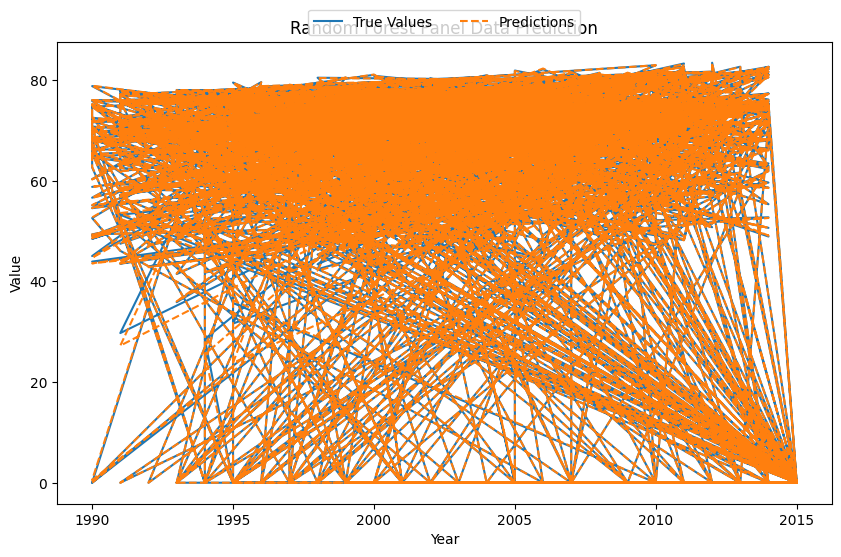

In [ ]:
plot_results(df_test_and_predicted_rf, 'Random Forest')

## XGBoost Regressor

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3)
for col in X_train.select_dtypes(include=['object']).columns:
    try:
        X_train[col] = pd.to_numeric(X_train[col])
        X_test[col] = pd.to_numeric(X_test[col]) # Apply the same transformation to X_test
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. You might need to handle it differently.")

# Now you can fit the model:
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse_xgb}')

Mean Squared Error: 0.3135927988610456


In [ ]:
# Get feature importances from the trained model
importances_xgb = xgb_model.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_xgb = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_xgb}).sort_values('Gini Importance', ascending=False)
df_feature_importance_xgb['Feature Name'] = df_feature_importance_xgb['Feature Code'].map(kpi_dict)
df_feature_importance_xgb['Model'] = 'XGBoost Regressor'
df_feature_importance_xgb

,Feature Code,Gini Importance,Feature Name,Model
158,SP.DYN.LE00.FE.IN,0.46273,"Life expectancy at birth, female (years)",XGBoost Regressor
157,SP.DYN.LE00.MA.IN,0.41534,"Life expectancy at birth, male (years)",XGBoost Regressor
154,SP.DYN.CBRT.IN,0.05282,"Birth rate, crude (per 1,000 people)",XGBoost Regressor
155,SP.DYN.CDRT.IN,0.03958,"Death rate, crude (per 1,000 people)",XGBoost Regressor
166,SP.DYN.AMRT.FE,0.02764,"Mortality rate, adult, female (per 1,000 femal...",XGBoost Regressor
...,...,...,...,...
64,SP.POP.65UP.MA.ZS,0.00000,"Population ages 65 and above, male (% of total)",XGBoost Regressor
69,SP.POP.1564.FE.ZS,0.00000,"Population ages 15-64, female (% of total)",XGBoost Regressor
70,SP.POP.1564.MA.ZS,0.00000,"Population ages 15-64, male (% of total)",XGBoost Regressor
71,SP.POP.TOTL.MA.ZS,0.00000,"Population, male (% of total)",XGBoost Regressor


In [ ]:
df_test_and_predicted_xgb, df_actual_vs_predicted_xgb = compare_actual_vs_predicted(X_test, y_test, y_pred_xgb, 'XGBoost Regressor')
df_actual_vs_predicted_xgb

,Actual,Predicted,Model
554,0.00000,0.01440,XGBoost Regressor
4982,56.83200,56.69467,XGBoost Regressor
3116,60.05029,59.71821,XGBoost Regressor
1673,78.23171,78.10456,XGBoost Regressor
549,0.00000,0.01440,XGBoost Regressor
...,...,...,...
4778,72.34639,72.27035,XGBoost Regressor
3141,74.28676,74.10772,XGBoost Regressor
362,75.23366,74.95686,XGBoost Regressor
4265,61.93454,61.91116,XGBoost Regressor


In [ ]:
plot_kpi(df_test_and_predicted_xgb, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_xgb, 'Year', 'Predicted', hue_col='Country Code')

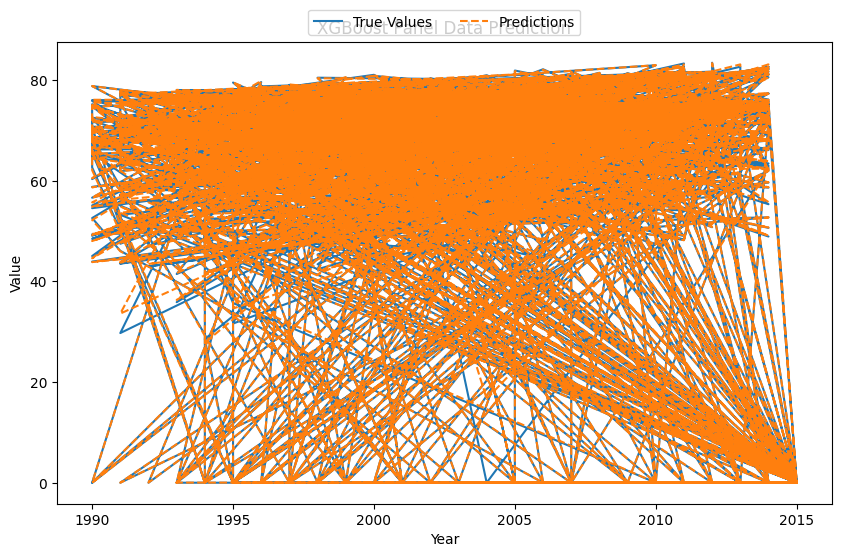

In [ ]:
plot_results(df_test_and_predicted_xgb, 'XGBoost')

##LightGBM Regressor

In [ ]:
# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.05, max_depth=3)

le = LabelEncoder()
y_train_1 = y_train.to_string()
y_test_1 = y_test.to_string()

#y_train['SP.DYN.LE00.IN'] = le.fit_transform(y_train['SP.DYN.LE00.IN'].astype(str))
#y_test['SP.DYN.LE00.IN'] = le.transform(y_test['SP.DYN.LE00.IN'].astype(str))

# After applying one of the above options, retrain the model:
lgb_model.fit(X_train, y_train_1)

# Make predictions
y_pred_lgbm = lgb_model.predict(X_test)

# Evaluate the model's performance
mse_lgbm = mean_squared_error(y_test_1, y_pred_lgbm)
print(f'Mean Squared Error: {mse_lgbm}')

TypeError: Wrong type(str) for label.
It should be list, numpy 1-D array or pandas Series

##Catboost Regressor

##SVM Regressor

##Panel Data Regression

# Observations



1.   Dataframe is wide.
2.   Not all year-country-indicator column is populated.
3.   Country Name includes both individual countries and conglomerates. Ex. Arab World.



# Considerations



1.   Consider to shift timeline
2.   Check the KPI column population per country to decide, consider a threshold where for a particular KPI, if x countries have populated data which is above the threshold, consider it.



# Research Questions

Which features affect "Life expectancy at birth, total (years)" across different regions and socio economic conditions ('High income', 'Middle income', 'Low & middle income', 'Lower middle income', 'Low income')?

# Exploratory Data Analysis - Matt

In [ ]:
pd.set_option('display.max_columns', None)
# health_df[health_df['Indicator Name'] == 'Literacy rate, youth total (% of people ages 15-24)'].info()

In [ ]:
income_range_df = health_df[health_df['Country Name'].isin(['High income', 'Low & middle income', ' Lower middle income', 'Low income', 'Middle income'])]
display(income_range_df.shape, income_range_df.head())

In [ ]:
ed_indicators = ['Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
                'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
                'Literacy rate, adult female (% of females ages 15 and above)',
                'Literacy rate, adult male (% of males ages 15 and above)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Literacy rate, youth male (% of males ages 15-24)',
                'Literacy rate, youth total (% of people ages 15-24)',
                'Primary completion rate, female (% of relevant age group)',
                'Primary completion rate, male (% of relevant age group)',
                'Primary completion rate, total (% of relevant age group)',
                'Public spending on education, total (% of GDP)',
                'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
                'Ratio of young literate females to males (% ages 15-24)',
                'School enrollment, primary (% gross)',
                'School enrollment, primary (% net)',
                'School enrollment, primary, female (% gross)',
                'School enrollment, primary, female (% net)',
                'School enrollment, primary, male (% gross)',
                'School enrollment, primary, male (% net)',
                'School enrollment, secondary (% gross)',
                'School enrollment, secondary (% net)',
                'School enrollment, secondary, female (% gross)',
                'School enrollment, secondary, female (% net)',
                'School enrollment, secondary, male (% gross)',
                'School enrollment, secondary, male (% net)',
                'School enrollment, tertiary (% gross)',
                'School enrollment, tertiary, female (% gross)']

In [ ]:
# set number of rows to display
pd.set_option('display.max_rows', 150)
# drop all columns prior to 1970
columns_to_drop = [str(year) for year in range(1960, 1970)]
# income_range_df = income_range_df.drop(columns=columns_to_drop)
ed_df = income_range_df[income_range_df['Indicator Name'].isin(ed_indicators)].drop(columns=['Country Code', 'Indicator Code'])
ed_df
li_ed_df = ed_df[ed_df['Country Name'] == 'Low income'].drop(columns=['2014', '2015', 'Unnamed: 60'])
li_ed_df

In [ ]:
li_lit_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Literacy rate, youth female (% of females ages 15-24)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
li_lit_df

In [ ]:
df = li_lit_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates Over Time')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's look at formal education

In [ ]:
primary_completion_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Primary completion rate, female (% of relevant age group)',
    'Primary completion rate, male (% of relevant age group)',
    'Primary completion rate, total (% of relevant age group)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
# primary_completion_df

In [ ]:
df = primary_completion_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.title('Primary Completion Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Completion Rate (%)')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
li_gni_df = health_df[health_df['Country Name'] == 'Low income']
li_gni_df = li_gni_df[li_gni_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
columns_to_drop = [str(year) for year in range(1960, 1988)]
li_gni_df = li_gni_df.drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60']).drop(columns=columns_to_drop)
li_gni_df.set_index('Indicator Name', inplace=True)
# li_gni_df

In [ ]:
li_gni_df = li_gni_df.transpose()
li_gni_df.plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')


In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
health_indicators = ['Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Prevalence of anemia among pregnant women (%)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of HIV, female (% ages 15-24)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of overweight (% of adults)',
       'Prevalence of overweight (% of children under 5)',
       'Prevalence of overweight, female (% of children under 5)',
       'Prevalence of overweight, female (% of female adults)',
       'Prevalence of overweight, male (% of children under 5)',
       'Prevalence of overweight, male (% of male adults)',
       'Prevalence of severe wasting, weight for height (% of children under 5)',
       'Prevalence of severe wasting, weight for height, female (% of children under 5)',
       'Prevalence of severe wasting, weight for height, male (% of children under 5)',
       'Prevalence of syphilis (% of women attending antenatal care)',
       'Prevalence of tuberculosis (per 100,000 population)',
       'Prevalence of undernourishment (% of population)',
       'Prevalence of wasting (% of children under 5)',
       'Prevalence of wasting, female (% of children under 5)',
       'Prevalence of wasting, male (% of children under 5)',
       'Malnutrition prevalence, height for age (% of children under 5)',
       'Malnutrition prevalence, height for age, female (% of children under 5)',
       'Malnutrition prevalence, height for age, male (% of children under 5)',
       'Malnutrition prevalence, weight for age (% of children under 5)',
       'Malnutrition prevalence, weight for age, female (% of children under 5)',
       'Malnutrition prevalence, weight for age, male (% of children under 5)',
       'Maternal leave benefits (% of wages paid in covered period)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Mortality rate, infant, male (per 1,000 live births)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Mortality rate, under-5 (per 1,000)',
       'Mortality rate, under-5, female (per 1,000)',
       'Mortality rate, under-5, male (per 1,000)']

In [ ]:
li_health_df = health_df[health_df['Indicator Name'].isin(health_indicators)][health_df['Country Name'] == 'Low income'].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
li_health_df

In [ ]:
# li_health_df.isna().sum()

In [ ]:
li_adult_mortality_df = li_health_df[li_health_df['Indicator Name'].isin(['Mortality rate, adult, female (per 1,000 female adults)',
                                                                          'Mortality rate, adult, male (per 1,000 male adults)'])]
li_adult_mortality_df



In [ ]:
li_adult_mortality_df = li_adult_mortality_df.set_index('Indicator Name').transpose()



In [ ]:
# rename index to "Year"
li_adult_mortality_df.index.name = 'Year'
li_adult_mortality_df

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
# add more space between plots
plt.subplots_adjust(hspace=0.5)

# plot adult mortality rate
axes[0][0].plot(li_adult_mortality_df.index, li_adult_mortality_df)
axes[0][0].set_title('Adult Mortality Rate by Year')
# only display xticks for every five years
axes[0][0].set_xticks(range(0, len(li_adult_mortality_df.index), 5))
axes[0][0].set_xticklabels(li_adult_mortality_df.index[::5])

# plot primary school completion rate
axes[0][1].plot(primary_completion_df.transpose().index, primary_completion_df.transpose())
axes[0][1].set_title('Primary School Completion Rate by Year')
axes[0][1].set_xticks(range(0, len(primary_completion_df.transpose().index), 5))
axes[0][1].set_xticklabels(primary_completion_df.transpose().index[::5])

# plot GNI per capita by year
axes[1][0].plot(li_gni_df.index, li_gni_df)
axes[1][0].set_title('GNI per Capita by Year')
axes[1][0].set_xticks(range(0, len(li_gni_df.index), 5))
axes[1][0].set_xticklabels(li_gni_df.index[::5])

# plot literacy rates over time
axes[1][1].plot(li_lit_df.transpose().index, li_lit_df.transpose())
axes[1][1].set_title('Literacy Rates by Year')


# Conclusions So Far
My hypothesis was that increasing education levels in low income countries might have a positive effect on life expectancy (or, as seen in the plots above, a decreasing effect on mortality rates). It seems clear, however, that at least in a broad sense, any effects of education are overshadowed by general wealth levels. That is to say, there's a definite correlation between education levels (as measured by primary school completion and literacy rates) and a decrease in adulkt mortality rates. However, GNI per capita seems to correlate even better with mortality rates than the chosen education metrics. (Note the dip and then plateau in GNI matches the brief rise in mortality rate from roughly 1990 to 2000.) This means we can't tell if education itself has anything to do with decreasing adult mortality rates, or if increased education and lower mortality rates are both effects of increasing wealth. Alternatively, it could be the case that education is the root cause of both decreasing mortality and increasing wealth.

As far as predictions go, this is not necessarily a problem. We could build a model to predict mortality rate that takes these factors (and others) into consideration. When it comes to elucidating causes and suggesting interventions, however, we want to know what has the most impact.

# Next Direction to Pursue
## Dig Deeper into the metrics
I suspect that the data I've examined so far will prove fairly representative, but I want to take a look at similar indicators to see if they follow the same patterns. I'll look at education indicators and health indicators in different categories - adult, youth - and in more specific areas, such HIV rates (which may correlate with sexual health education) and malaria incidence.

In [ ]:
reproductive_ed_indicators = [
    '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
    '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions',
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Condom use with non regular partner, % adults(15-49), female',
    'Condom use with non regular partner, % adults(15-49), male',
    'Condom use, population ages 15-24, female (% of females ages 15-24)',
    'Condom use, population ages 15-24, male (% of males ages 15-24)',
    'Contraceptive prevalence, any methods (% of women ages 15-49)',
    'Contraceptive prevalence, modern methods (% of women ages 15-49)'
    ]
hiv_outcomes = [
    'Children (0-14) living with HIV',
    'Children (ages 0-14) newly infected with HIV',
    'Children orphaned by HIV/AIDS',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Adults (ages 15+) and children (0-14 years) living with HIV',
    'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
    'Adults (ages 15+) living with HIV',
    'Adults (ages 15+) newly infected with HIV'
    ]

In [ ]:
low_income_df = health_df[health_df['Country Name'] == 'Low income']
reproductive_ed_df = low_income_df[low_income_df['Indicator Name'].isin(reproductive_ed_indicators)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
reproductive_ed_df

In [ ]:
reproductive_ed_df = reproductive_ed_df.dropna(axis=0, thresh=2)

In [ ]:
reproductive_ed_df

In [ ]:
reproductive_ed_df.set_index('Indicator Name').transpose().fillna(method='ffill').plot(kind='line', figsize=(10, 4))
plt.title('Reproductive Health Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

In [ ]:
hiv_df = low_income_df[low_income_df['Indicator Name'].isin(hiv_outcomes)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
hiv_df

In [ ]:
hiv_df = hiv_df.set_index('Indicator Name').dropna(thresh=5).transpose().fillna(method='ffill')
hiv_df.plot(kind='line', figsize=(10, 4))
plt.title('HIV Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Reproductive Health
Here we see that higher contraceptive use, regardless of the specific method, is correlated with lower adolescent birth rates and lower prevalence of HIV over time.

Let's also look at:
* malaria
* spending on education
* education beyond primary
* separate countries that fall into low income level



In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
gni_df = health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].drop(columns=['Country Code', 'Indicator Code', 'Indicator Name', 'Unnamed: 60'])
gni_df

In [ ]:
# let's plot gni_df
gni_df.set_index('Country Name').transpose().plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
# no legend
plt.legend().set_visible(False)

That's not very informative...

# Let's Look at Individual Low-Income Countries
We'll create a threshold, based on an average of each country's GNI per capita over time, and examine the data and trends for all countries under that threshold.

In [ ]:
# let's find average gni for every Country Name in gni_df
gni_df[gni_df['Country Name'] == 'Low income']

In [ ]:
avg_gni = gni_df.bfill(axis=1)
avg_gni = avg_gni.set_index('Country Name')
avg_gni = avg_gni.ffill(axis=1).sort_values(by='Country Name')
avg_gni = avg_gni.ffill(axis=1).dropna()
avg_gni = avg_gni.mean(axis=1)
avg_gni.describe()

In [ ]:
avg_gni

I can use the info above to create my own list of low income countries and see if anything interesting shows up in the numbers for that group that is hidden in the aggregate view where country name = 'Low income'. Let's use the average value for the 'Low income' Country Name as our threshold, but let's bump it up a little bit to include a few more countries.

In [ ]:
avg_gni['Low income']

In [ ]:
threshhold = avg_gni['Low income'] + 150

In [ ]:
# build a custom list of low income countries
low_income_countries = avg_gni[avg_gni < threshhold].index.tolist()
low_income_countries.remove('Least developed countries: UN classification')  # remove the aggregate names
low_income_countries.remove('Low income')
low_income_countries.remove('Heavily indebted poor countries (HIPC)')
low_income_countries

In [ ]:
# filter the main df to include only those countries in the new list
new_df = health_df[health_df['Country Name'].isin(low_income_countries)]
new_df

In [ ]:
# build a df of education indicators for the low income countries
new_ed_df = new_df[new_df['Indicator Name'].isin(ed_indicators)]
# new_ed_df

In [ ]:
# new_ed_df.info()
# there's no non-null data in the columns 1960-1969, or in "unnamed", so let's drop those
new_ed_df = new_ed_df.drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, how='all')
# new_ed_df

In [ ]:
female_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# female_youth_hiv_ed_df
# 2005, 2006, 2010, 2014

In [ ]:
male_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# male_youth_hiv_ed_df

In [ ]:
youth_hiv_ed_df = male_youth_hiv_ed_df.merge(female_youth_hiv_ed_df, how='outer', on="Country Name", suffixes=("_male", "_female"))
youth_hiv_ed_df

In [ ]:
big_hiv_df = new_df[new_df['Indicator Name'].isin(['Prevalence of HIV, female (% ages 15-24)', 'Prevalence of HIV, male (% ages 15-24)'])].dropna(thresh=5).drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, thresh=5)[['Country Name', '2005', '2006', '2010', '2014']].merge(youth_hiv_ed_df, how='inner', on="Country Name")

In [ ]:
df = new_df[new_df['Indicator Name'] == 'Prevalence of HIV, female (% ages 15-24)'][['Country Name', '2005', '2006', '2010', '2014']].merge(female_youth_hiv_ed_df, how='inner', on="Country Name", suffixes=('_hiv', '_ed')).dropna(axis=1, thresh=3)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
df_melted_hiv = df.melt(id_vars=['Country Name'], value_vars=['2005_hiv', '2006_hiv', '2010_hiv', '2014_hiv'],
                        var_name='Year', value_name='HIV')
df_melted_hiv['Year'] = df_melted_hiv['Year'].str.extract('(\d+)')

df_melted_ed = df.melt(id_vars=['Country Name'], value_vars=['2005_ed', '2006_ed', '2010_ed', '2014_ed'],
                       var_name='Year', value_name='Education')
df_melted_ed['Year'] = df_melted_ed['Year'].str.extract('(\d+)')

# Merge the two melted DataFrames
df_combined = pd.merge(df_melted_hiv, df_melted_ed, on=['Country Name', 'Year'])


In [ ]:
df_combined_cleaned = df_combined.dropna(subset=['HIV', 'Education'])

df_combined_cleaned

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with all countries combined
plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_combined_cleaned, x="Education", y="HIV", hue="Country Name", palette="tab20", alpha=0.8)
sns.regplot(data=df_combined_cleaned, x="Education", y="HIV", scatter=True)

# Add labels and title
plt.title("Correlation Between Education and HIV Prevalence Across Countries", fontsize=16)
plt.xlabel("HIV Education Level (%)", fontsize=14)
plt.ylabel("HIV Prevalence (%)", fontsize=14)
# plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
adult_lit = new_df[new_df['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)']
adult_lit

In [ ]:
ed_indicators